<a href="https://colab.research.google.com/github/nihachaganti/FMML-2023_PROJECT_and_SUBMISSION/blob/main/Copy_of_FMML_Aug'22_M9_L2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Foundation of Modern Machine Learning
## Module 9: Neural Networks
## Lab 2: Using MLP for multiclass classification
#### Module Coordinator: Shantanu Agrawal




Till now, we got to know what is MLP, how it can be used for classification. We have done the single class classification in the previous lab session.

In this notebook we will try to use an MLP for multiclass classification on the iris dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data preparation

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the iris dataset
iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

# Scale data to have mean 0 and variance 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=2)

# Visualising dataset

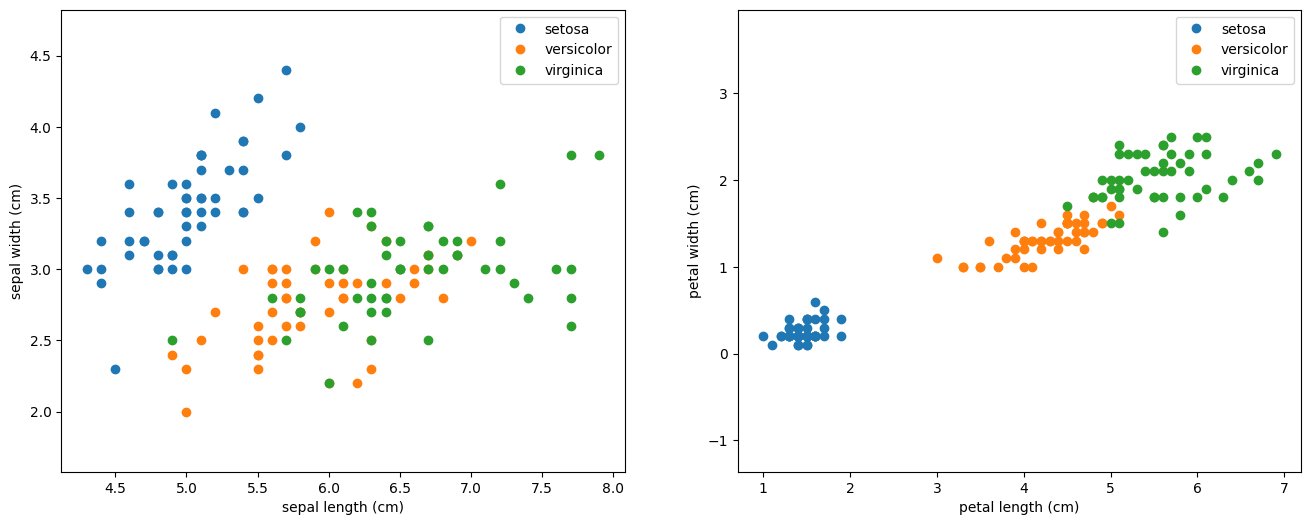

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax1.plot(X_plot[:, 0], X_plot[:, 1],
             linestyle='none',
             marker='o',
             label=target_name)
ax1.set_xlabel(feature_names[0])
ax1.set_ylabel(feature_names[1])
ax1.axis('equal')
ax1.legend();

for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax2.plot(X_plot[:, 2], X_plot[:, 3],
             linestyle='none',
             marker='o',
             label=target_name)
ax2.set_xlabel(feature_names[2])
ax2.set_ylabel(feature_names[3])
ax2.axis('equal')
ax2.legend();


# Observing the dataset

Thus, we can observe the dataset and see that there are *3 classes, setosa, versicolor, and virginica*.

There are *4 features, sepal width, sepal length, petal width, petal length*.

# MLP for multiclass classification

In [4]:
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.autograd import Variable
import tqdm

In [5]:
# Defining the model architecture
class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 50)
        self.layer3 = nn.Linear(50, 3)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)
        return x

In [6]:
# Instantiating the model, using Adam optimiser, and Cross Entropy Loss, which is quite commonlu used for classification tasks.
model     = Model(X_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn   = nn.CrossEntropyLoss()

# Train the model

In [7]:
# Train for 100 epochs
EPOCHS  = 100
X_train = torch.from_numpy(X_train).float()
X_test= torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test)
y_train = torch.from_numpy(y_train)


loss_list     = np.zeros((EPOCHS,))
accuracy_list = np.zeros((EPOCHS,))

for epoch in tqdm.trange(EPOCHS):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    loss_list[epoch] = loss.item()

    # Zero gradients
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    with torch.no_grad():
        y_pred = model(X_test)
        correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
        accuracy_list[epoch] = correct.mean()

100%|██████████| 100/100 [00:00<00:00, 348.68it/s]


# Plot training progress

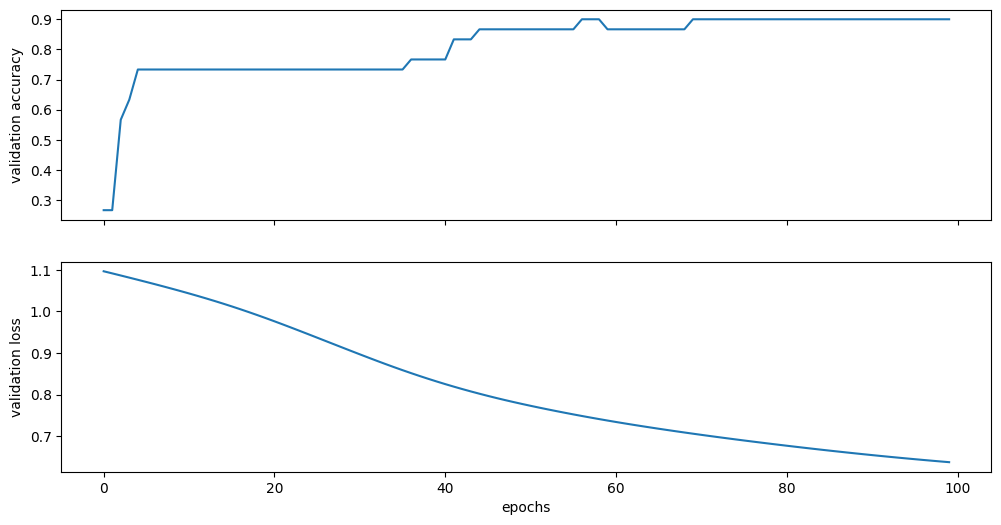

In [8]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)

ax1.plot(accuracy_list)
ax1.set_ylabel("validation accuracy")
ax2.plot(loss_list)
ax2.set_ylabel("validation loss")
ax2.set_xlabel("epochs");

# Experiment with the neural network architecture


1.   Try changing the number of hidden layers.
2.   Try changing the number of neurons in the hidden layer.
3.   Try using a different activation function.




Can you observe any changes?

#Answer For Question 1:



In [9]:
# Preparing Dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=2)

# Defining the model architecture
class Model_exp1(nn.Module):
    def __init__(self, input_dim):
        super(Model_exp1, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 50)
        self.layer3 = nn.Linear(50, 50)
        self.layer4 = nn.Linear(50, 50)
        self.layer5 = nn.Linear(50, 50)
        self.layer6 = nn.Linear(50, 50)
        self.layer7 = nn.Linear(50, 3)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.relu(self.layer3(x))
        x = F.relu(self.layer4(x))
        x = F.relu(self.layer5(x))
        x = F.relu(self.layer6(x))
        x = F.softmax(self.layer7(x), dim=1)
        return x

In [10]:
# Instantiating the model, using Adam optimiser, and Cross Entropy Loss, which is quite commonlu used for classification tasks.
model     = Model_exp1(X_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn   = nn.CrossEntropyLoss()

# Train for 100 epochs
EPOCHS  = 100
X_train = torch.from_numpy(X_train).float()
X_test= torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test)
y_train = torch.from_numpy(y_train)


loss_list = np.zeros((EPOCHS,))
accuracy_list_train = np.zeros((EPOCHS,))
accuracy_list_test = np.zeros((EPOCHS,))

for epoch in tqdm.trange(EPOCHS):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    loss_list[epoch] = loss.item()

    # Zero gradients
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    with torch.no_grad():
        # Test Accuracy
        y_pred = model(X_test)
        correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
        accuracy_list_test[epoch] = correct.mean()

        # Train Accuracy
        y_pred = model(X_train)
        correct = (torch.argmax(y_pred, dim=1) == y_train).type(torch.FloatTensor)
        accuracy_list_train[epoch] = correct.mean()

100%|██████████| 100/100 [00:00<00:00, 312.47it/s]


Text(0.5, 0, 'epochs')

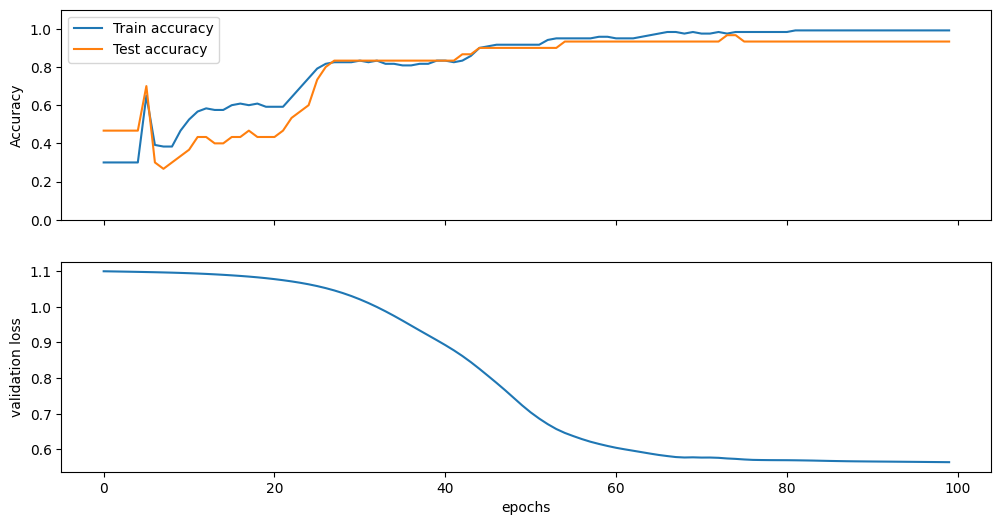

In [11]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)

ax1.plot(accuracy_list_train, label="Train accuracy")
ax1.plot(accuracy_list_test, label="Test accuracy")
ax1.legend()
ax1.set_ylabel("Accuracy")
ax1.set_ylim(0, 1.1)
ax2.plot(loss_list)
ax2.set_ylabel("validation loss")
ax2.set_xlabel("epochs")

#Answer For Question 2:

In [12]:

# Defining the model architecture
class Model_exp2(nn.Module):
    def __init__(self, input_dim, neurons):
        super(Model_exp2, self).__init__()
        self.layer1 = nn.Linear(input_dim, neurons)
        self.layer2 = nn.Linear(neurons, neurons)
        self.layer3 = nn.Linear(neurons, 3)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)
        return x

In [13]:
# Instantiating the model, using Adam optimiser, and Cross Entropy Loss, which is quite commonlu used for classification tasks.
neurons = [50, 100, 1000, 10000]
for neuron_count in neurons:
  # Preparing Dataset
  X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=2)
  print(f"================== Number of neurons in the hidden layer = {neuron_count} ==================")
  model     = Model_exp2(X_train.shape[1], neuron_count)
  optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
  loss_fn   = nn.CrossEntropyLoss()

  # Train for 100 epochs
  EPOCHS  = 100
  X_train = torch.from_numpy(X_train).float()
  X_test= torch.from_numpy(X_test).float()
  y_test = torch.from_numpy(y_test)
  y_train = torch.from_numpy(y_train)


  loss_list = np.zeros((EPOCHS,))
  accuracy_list_train = np.zeros((EPOCHS,))
  accuracy_list_test = np.zeros((EPOCHS,))

  for epoch in tqdm.trange(EPOCHS):
      y_pred = model(X_train)
      loss = loss_fn(y_pred, y_train)
      loss_list[epoch] = loss.item()

      # Zero gradients
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      with torch.no_grad():
          # Test Accuracy
          y_pred = model(X_test)
          correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
          accuracy_list_test[epoch] = correct.mean()

          # Train Accuracy
          y_pred = model(X_train)
          correct = (torch.argmax(y_pred, dim=1) == y_train).type(torch.FloatTensor)
          accuracy_list_train[epoch] = correct.mean()

================== Number of neurons in the hidden layer = 50 ==================


100%|██████████| 100/100 [00:00<00:00, 602.06it/s]


================== Number of neurons in the hidden layer = 100 ==================


100%|██████████| 100/100 [00:00<00:00, 536.18it/s]


================== Number of neurons in the hidden layer = 1000 ==================


100%|██████████| 100/100 [00:02<00:00, 34.64it/s]


================== Number of neurons in the hidden layer = 10000 ==================


100%|██████████| 100/100 [13:02<00:00,  7.83s/it]


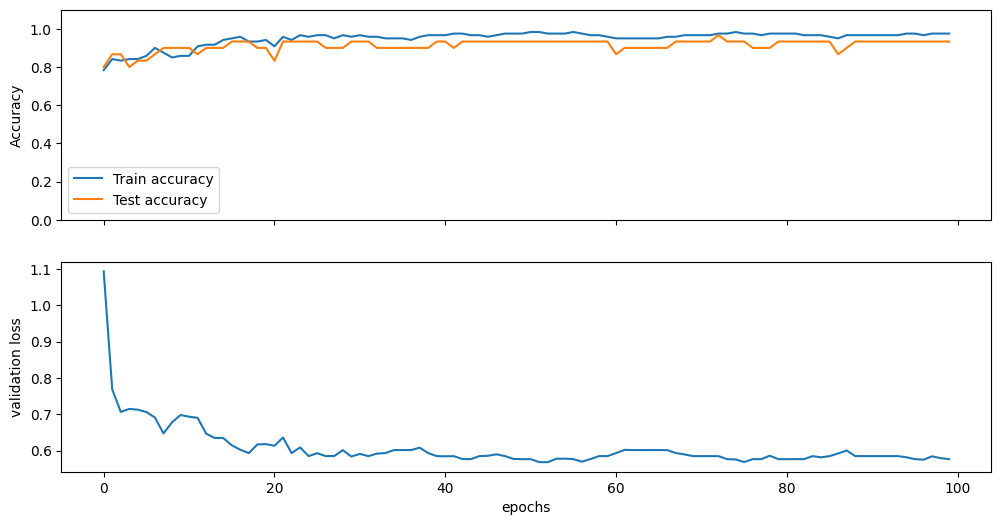

In [14]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)

ax1.plot(accuracy_list_train, label="Train accuracy")
ax1.plot(accuracy_list_test, label="Test accuracy")
ax1.legend()
ax1.set_ylabel("Accuracy")
ax1.set_ylim(0, 1.1)
ax2.plot(loss_list)
ax2.set_ylabel("validation loss")
ax2.set_xlabel("epochs")
plt.show()


As we increases the number of neurons, the model started to behave similar . If we increased the hidden layers , faster the convergence, higher the accuracy, longer the training time and tendency to over fit.

#Answer For Question 3:

In [15]:
# Defining the model architecture
# Using sigmoid as activation function
class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 100)
        self.layer2 = nn.Linear(100, 50)
        self.layer3 = nn.Linear(50, 3)

    def forward(self, x):
        x = F.sigmoid(self.layer1(x))
        x = F.sigmoid(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)
        return x

In [16]:
# Instantiating the model, using Adam optimiser, and Cross Entropy Loss, which is quite commonlu used for classification tasks.
model     = Model(X_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn   = nn.CrossEntropyLoss()

In [17]:
# Train for 100 epochs
EPOCHS  = 100

loss_list     = np.zeros((EPOCHS,))
accuracy_list = np.zeros((EPOCHS,))

for epoch in tqdm.trange(EPOCHS):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    loss_list[epoch] = loss.item()

    # Zero gradients
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    with torch.no_grad():
        y_pred = model(X_test)
        correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
        accuracy_list[epoch] = correct.mean()

100%|██████████| 100/100 [00:00<00:00, 554.40it/s]


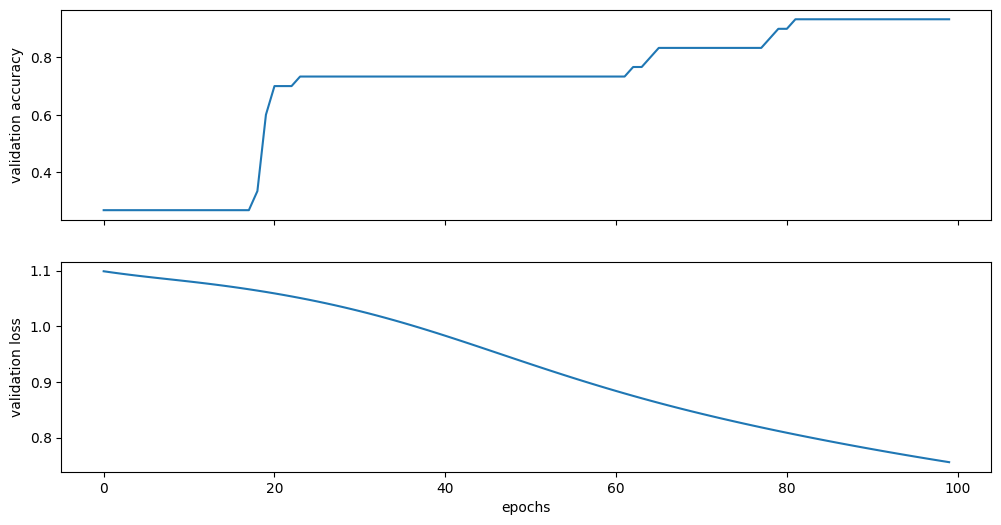

In [18]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)

ax1.plot(accuracy_list)
ax1.set_ylabel("validation accuracy")
ax2.plot(loss_list)
ax2.set_ylabel("validation loss")
ax2.set_xlabel("epochs");

In [19]:

# Defining the model architecture
# Using tanh as activation function
class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 100)
        self.layer2 = nn.Linear(100, 50)
        self.layer3 = nn.Linear(50, 3)

    def forward(self, x):
        x = F.tanh(self.layer1(x))
        x = F.tanh(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)
        return x

In [20]:
# Instantiating the model, using Adam optimiser, and Cross Entropy Loss, which is quite commonlu used for classification tasks.
model     = Model(X_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn   = nn.CrossEntropyLoss()



In [21]:
# Train for 100 epochs
EPOCHS  = 100

loss_list     = np.zeros((EPOCHS,))
accuracy_list = np.zeros((EPOCHS,))

for epoch in tqdm.trange(EPOCHS):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    loss_list[epoch] = loss.item()

    # Zero gradients
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    with torch.no_grad():
        y_pred = model(X_test)
        correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
        accuracy_list[epoch] = correct.mean()

100%|██████████| 100/100 [00:00<00:00, 587.71it/s]


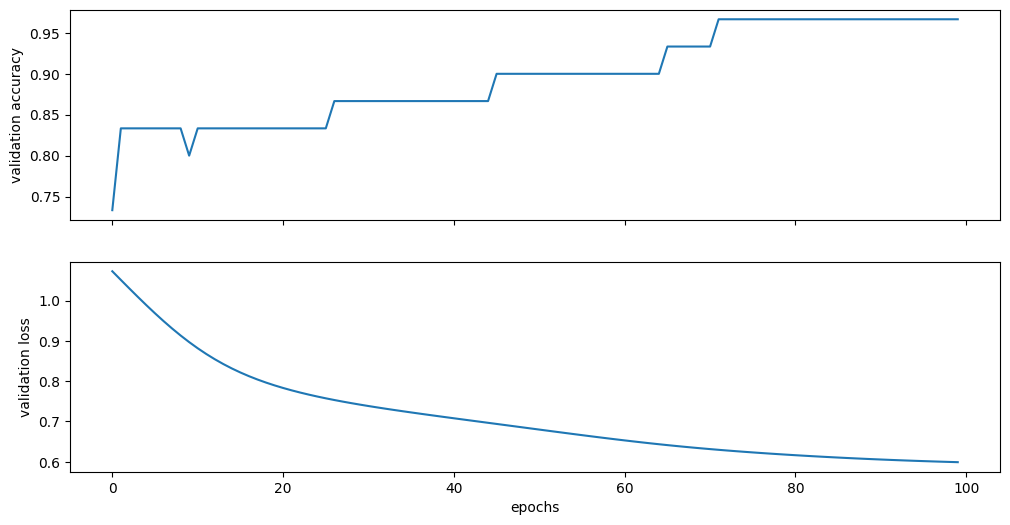

In [22]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)

ax1.plot(accuracy_list)
ax1.set_ylabel("validation accuracy")
ax2.plot(loss_list)
ax2.set_ylabel("validation loss")
ax2.set_xlabel("epochs");



The plot show the variation in loss and accuracy while using different sigmoid function like relu, tanh, sigmoid. In this particular case, tanh seems to be a better activation function.